In [1]:
# Data tools
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

# Iris dataset
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
# Set X and Y values
X = iris.data
Y = iris.target

In [7]:
# Import SVC model/ train test split and fit the data to the model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

model = SVC()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.5)

model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
# Import metrics to check accuracy, using expected and predicted Y values
from sklearn import metrics
predicted = model.predict(X_test)
expected = Y_test

print(metrics.accuracy_score(expected,predicted))

0.9733333333333334


In [11]:
# Will use different SVC models to show the different results we get from them
from sklearn import svm

X = iris.data[:,:2]
Y = iris.target

# SVC regularisation parameter
C = 1.0

# SVC with a linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)
# Gaussian Radial Bassis Function
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)
# SVC with a 3rd Degree Polynomial
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)
# SVC Linear
linear_svc = svm.LinearSVC(C=C).fit(X, Y)

In [14]:
# Set up a mesh grid with step size of 0.02 including all X and Y values
h = 0.02

x_min = X[:,0].min() - 1
x_max = X[:,0].max() + 1

y_min = X[:,1].min() - 1
y_max = X[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

In [15]:
# Title for the plots
title = ['SVC with Linear Kernel', 
         'Linear SVC (Linear Kernel)',
         'SVC with RBF Kernel', 
         'SVC with 3rd Degree Poly Kernel']

C:\Users\lewis\Miniconda3\lib\site-packages\matplotlib\contour.py:909: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


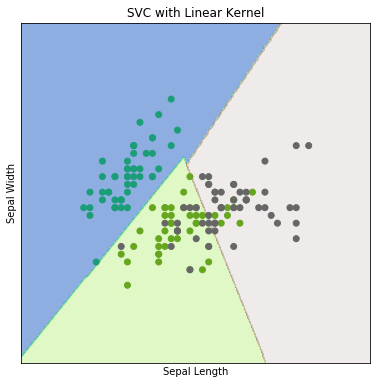

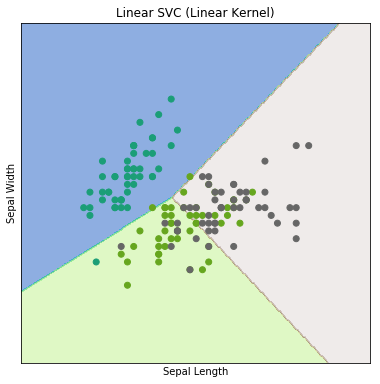

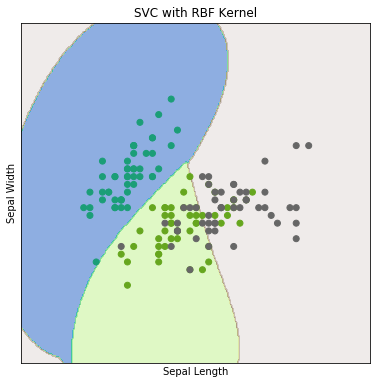

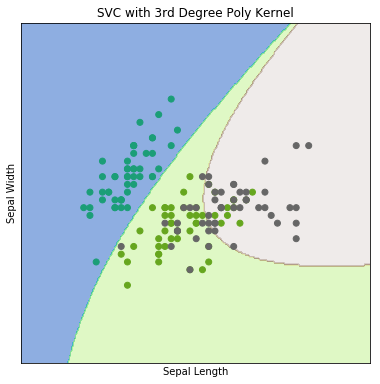

In [25]:
# Loop over each model and create a graph for each showing the contour lines and points for classification
for i, clf in enumerate((svc,linear_svc,rbf_svc,poly_svc)):
    
    plt.figure(figsize=(15,15))
    
    plt.subplot(2,2,i+1)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5, linewidths=0)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(title[i])      